In [1]:
from api_modules import *
import pandas as pd
import datetime
import config
import cartopy.crs as ccrs
import numpy as np
import matplotlib.pyplot as plt


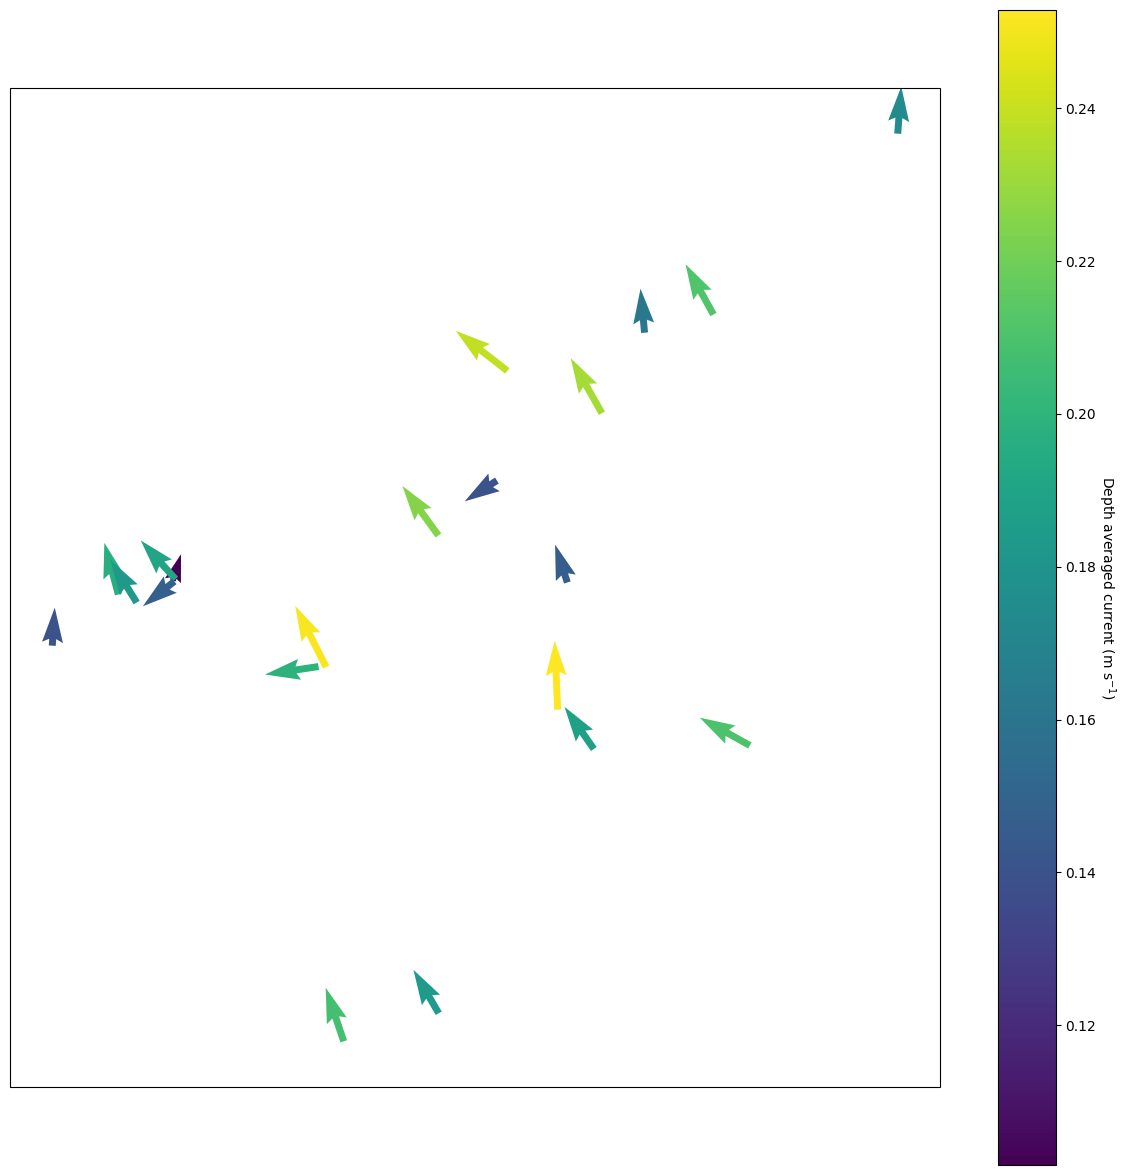

In [11]:
current_data = pd.read_csv("C:/Users/flapet/OneDrive - NOC/Documents/NRT_viz/biocarbon_nrt_data_viz/gliders_dac.csv")

min_lon = -19
max_lon = -18
min_lat = 59
max_lat = 61


#extract the lon and lat from the dataset only once
x = current_data['m_lon']
y = current_data['m_lat']


#From the U and V vector compute the speed, we use it as our colour map
u = current_data['m_water_vx']
v = current_data['m_water_vy']
speed = np.sqrt(u**2 + v**2)

#Set up the plot layout, extent and title
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
#ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())

#Plot the current vectors field and the coastline
im = ax.quiver(x, y, u, v, speed, angles='xy', scale_units='xy', cmap='viridis', transform=ccrs.PlateCarree())

#format the color bar
cbar = plt.colorbar(im, ax = ax, label=r'Depth averaged current (m s$^{-1}$)')
cbar.set_label(r'Depth averaged current (m s$^{-1}$)', rotation=270, labelpad=15)

#save the plot and then close it to avoid high memory usage
plt.show()

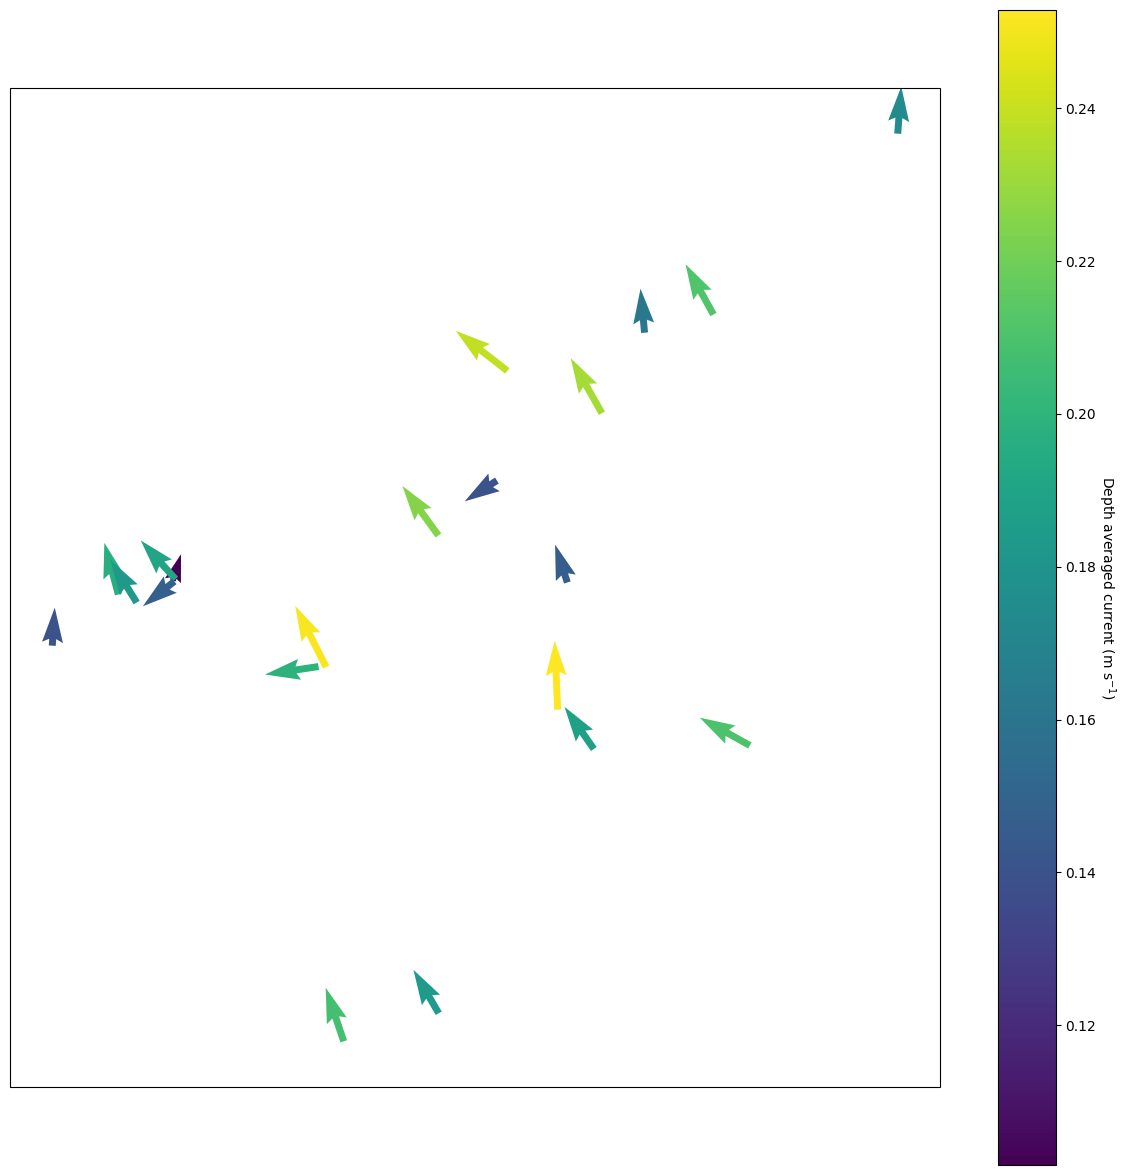

In [9]:
import cartopy.feature as cfeature

# Extract the lon and lat from the dataset only once
x = current_data['m_lon']
y = current_data['m_lat']

# From the U and V vector compute the speed, we use it as our color map
u = current_data['m_water_vx']
v = current_data['m_water_vy']
speed = np.sqrt(u**2 + v**2)

# Set up the plot layout, extent and title
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())

# Plot the current vectors field and the coastline
im = ax.quiver(x, y, u, v, speed, angles='xy', scale_units='xy', cmap='viridis', transform=ccrs.PlateCarree())

# Format the color bar
cbar = plt.colorbar(im, ax=ax, orientation='vertical', label=r'Depth averaged current (m s$^{-1}$)')
cbar.set_label(r'Depth averaged current (m s$^{-1}$)', rotation=270, labelpad=15)

# Save the plot and then close it to avoid high memory usage
plt.show()
plt.clf()
plt.close()